In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

labels = train.SalePrice

train.drop(["Id", "SalePrice"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [35]:
print(train.shape)
train.head()

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [36]:
all = pd.concat([train, test], axis=0)

In [37]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
CentralAir     	0.00	2
Elect

In [38]:
# some useless features
train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [39]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [40]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

In [41]:
all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NoFence,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,0,0,NoFence,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NoFence,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,272,0,0,0,NoFence,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,0,0,NoFence,0,12,2008,WD,Normal


In [42]:
all["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

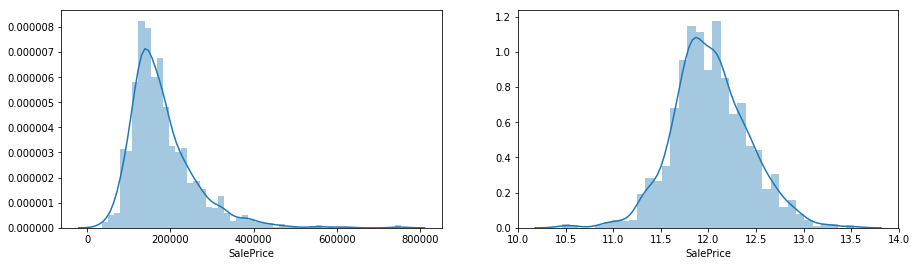

In [75]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(labels, ax=ax1)
sns.distplot(np.log1p(labels), ax=ax2)

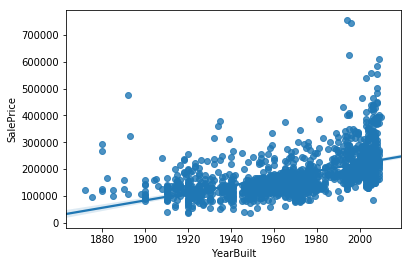

In [77]:
sns.regplot(train["YearBuilt"], labels)

(-0.21750331522000158, 4.2974640062573336e-17)


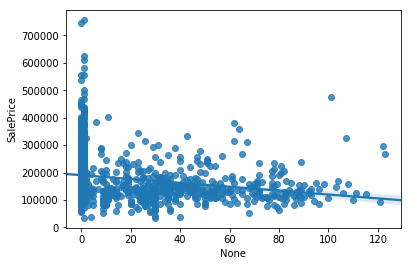

In [74]:
from scipy.stats import pearsonr

sns.regplot(train["YearRemodAdd"] - train["YearBuilt"], labels)
print(pearsonr(train["YearRemodAdd"] - train["YearBuilt"], labels))

'\nA\tAgriculture\nC\tCommercial\nFV\tFloating Village Residential\nI\tIndustrial\nRH\tResidential High Density\nRL\tResidential Low Density\nRP\tResidential Low Density Park \nRM\tResidential Medium Density\n'

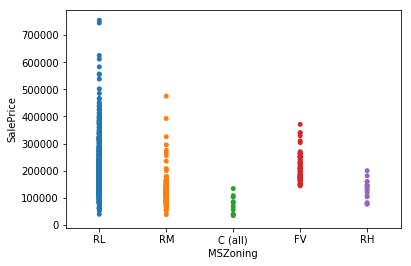

In [60]:
sns.stripplot(train["MSZoning"], labels)
"""
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density
"""

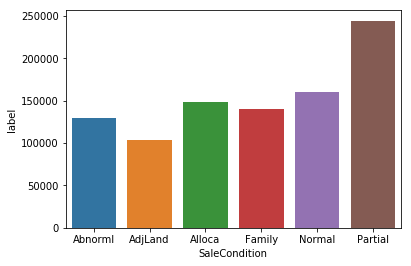

In [63]:
group_col = "SaleCondition"

train_with_labels = train.copy()
train_with_labels["label"] = labels
groupped = train_with_labels.groupby(group_col).median().reset_index()[[group_col, "label"]]
sns.barplot(groupped[group_col], groupped.label)

In [24]:
categorial = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "Fence", "SaleType", "SaleCondition"]
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

In [30]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=0)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=350, n_jobs=-1)
print(cross_val_score(regr, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.02178498727479501


In [32]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

regr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
regr.fit(train, np.log1p(labels))
preds = regr.predict(test)
submit(np.expm1(preds))

In [219]:
def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        self.encoding = X_copy.groupby(col)['target'].mean()
        return self
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)



def code_mean(train, test, labels, col, cv):
    mean_encoder = MeanEncoder(col)
    train_col = cross_val_predict(mean_encoder, train, labels, cv=cv)
    test_col = mean_encoder.fit(train, labels).predict(test)
    
    return train_col, test_col

* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить RandomForest
* Сгенерировать новые признаки